In [1]:
import pandas as pd
#Step1 - Loading Dataset
df = pd.read_csv("studentsresultdataset.csv")
print(f"rows: {df.shape[0]}, columns: {df.shape[1]}")
df.info()
df.describe()

rows: 20, columns: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   StudyHours  20 non-null     int64 
 1   Attendance  20 non-null     int64 
 2   PastScore   20 non-null     int64 
 3   Internet    20 non-null     object
 4   SleepHours  20 non-null     int64 
 5   Passed      20 non-null     object
dtypes: int64(4), object(2)
memory usage: 1.1+ KB


,StudyHours,Attendance,PastScore,SleepHours
count,20.000000,20.000000,20.00000,20.000000
mean,5.100000,74.150000,59.10000,6.050000
std,2.845125,17.372922,19.41215,2.038446
min,1.000000,40.000000,25.00000,3.000000
25%,2.750000,60.000000,43.75000,4.750000
50%,5.000000,77.000000,62.50000,6.000000
75%,7.250000,88.500000,72.75000,7.250000
max,10.000000,99.000000,90.00000,10.000000


In [3]:
#step-2 Preprocessing 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Internet'] = le.fit_transform(df['Internet'])
df['Passed'] = le.fit_transform(df['Passed'])

In [20]:
#step-3 Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
x = df_scaled[['StudyHours',	'Attendance',	'PastScore',	'Internet',	'SleepHours']]

X_scaled = scaler.fit_transform(x)

In [21]:
#step-4 TraintestSplit
from sklearn.model_selection import train_test_split
feature_cols = ['StudyHours', 'Attendance', 'PastScore', 'Internet', 'SleepHours']
X = df_scaled[feature_cols]
y = df_scaled['Passed']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)


In [22]:
#step-5 Train Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
#step-6 make prediction on test data 
y_predict = model.predict(X_test)

Classification_Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         3

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



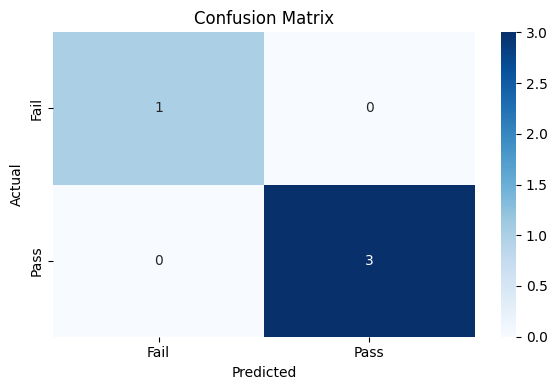

In [23]:
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
#step-7 Evaluate Preformance of Model
print("Classification_Report")
print(classification_report(y_test,y_predict))
confc_matrix = confusion_matrix(y_test,y_predict)
#Visualize confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confc_matrix,
           annot = True,
            fmt = 'd',
            cmap = 'Blues',
            xticklabels=['Fail', 'Pass'], 
            yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [24]:
# Step 8: Predict for a New Student
print("\n🔮 Predict Student Result")

try:
    # User inputs
    study_hours = float(input("Enter Study Hours: "))
    attendance = float(input("Enter Attendance (%): "))
    past_score = float(input("Enter Past Score: "))
    internet = input("Internet Access (Yes/No): ").strip().lower()
    sleep_hours = float(input("Enter Sleep Hours: "))

    # Encode Internet (same logic as training)
    internet = 1 if internet == "yes" else 0

    # Create input DataFrame with SAME columns & order
    user_input = pd.DataFrame([[
        study_hours,
        attendance,
        past_score,
        internet,
        sleep_hours
    ]], columns=feature_cols)

    # Scale input using SAME scaler
    user_input_scaled = scaler.transform(user_input)

    # Convert back to DataFrame (important)
    user_input_scaled = pd.DataFrame(
        user_input_scaled,
        columns=feature_cols
    )

    # Prediction
    result = model.predict(user_input_scaled)[0]
    probability = model.predict_proba(user_input_scaled)[0][1]

    # Output
    print("\n📊 Prediction Result:")
    if result == 1:
        print(f"✅ PASS (Probability: {probability:.2%})")
    else:
        print(f"❌ FAIL (Probability: {1 - probability:.2%})")

except Exception as e:
    print("❌ Error occurred:", e)



🔮 Predict Student Result


Enter Study Hours:  9
Enter Attendance (%):  99
Enter Past Score:  70
Internet Access (Yes/No):  1
Enter Sleep Hours:  6



📊 Prediction Result:
❌ FAIL (Probability: 100.00%)
